## Uses PyTrends
* Find Documenation here https://pypi.org/project/pytrends/
* First run pip install pytrends in terminal

In [16]:
# You need to run "pip install pytrends" in terminal in order to import pytrends
from pytrends.request import TrendReq
import pandas as pd
import time
startTime = time.time()
pytrend = TrendReq(hl='en-US', tz=360)

colnames = ["keywords"]
df = pd.read_csv("search_terms.csv", names=colnames)
df2 = df["keywords"].values.tolist()
df2.remove("Keywords")

dataset = []

for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2020-01-10 2020-08-05', # from and to dates here
     geo='US-IL') 
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

df = pd.concat(dataset, axis=1)
df.to_csv('trends.csv')
executionTime = (time.time() - startTime)
print('Execution time in sec.: ' + str(executionTime))
print(df)

Execution time in sec.: 2.8150851726531982
            domestic violence hotline  domestic violence help  \
date                                                            
2020-01-10                          0                       0   
2020-01-11                          0                       0   
2020-01-12                          0                       0   
2020-01-13                          0                       0   
2020-01-14                          0                       0   
...                               ...                     ...   
2020-08-01                          0                       0   
2020-08-02                          0                       0   
2020-08-03                          0                       0   
2020-08-04                         85                       0   
2020-08-05                          0                       0   

            domestic abuse hotline  domestic abuse help  order of protection  
date                            

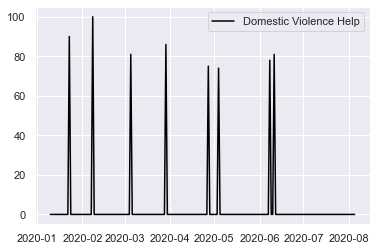

In [17]:
# import matplotlib plotting module to visualize data (make sure matplotlib is installed using pip)
import matplotlib.pyplot as plt

# plot all 5 trends in same chart
plt.figure()
plt.plot(df.index,df["domestic violence help"],'black')
plt.legend(['Domestic Violence Help']);

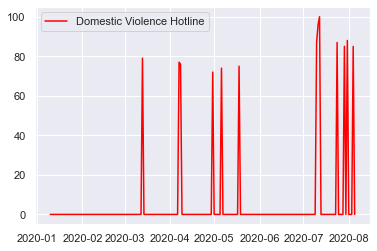

In [18]:
plt.figure()
plt.plot(df.index,df["domestic violence hotline"],'red')
plt.legend(['Domestic Violence Hotline']);

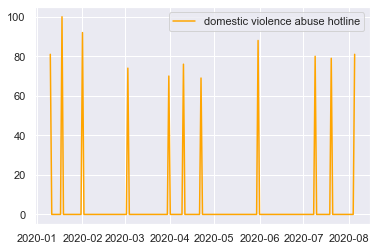

In [19]:
plt.figure()
plt.plot(df.index,df["domestic abuse hotline"],'orange')
plt.legend(['domestic violence abuse hotline']);

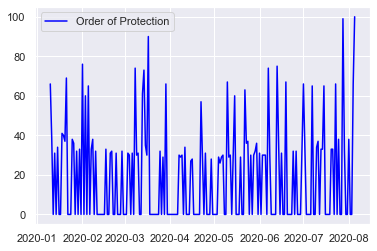

In [20]:
plt.figure()
plt.plot(df.index,df["order of protection"],'blue')
plt.legend(['Order of Protection']);

In [21]:
#plt.figure()
#plt.plot(df.index,df["domestic abuse help"],'green')
#plt.legend(['Domestic Abuse Help']);

In [22]:
 #reset_index
#df.reset_index(level=0,inplace=True) #reset_index
#df.columns=['date','domestic violence help','domestic violence hotline','order of protection'] #change column names

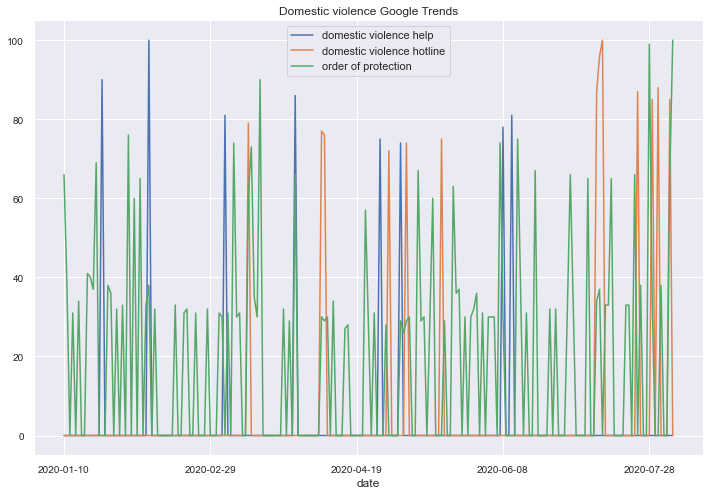

In [26]:
import seaborn as sns
sns.set(color_codes=True)
dx = df.plot(figsize = (12,8),x = "date", y=['domestic violence help','domestic violence hotline','order of protection'], kind="line", title = "Domestic violence Google Trends")
dx.set_xlabel = 'date'
dx.set_ylabel = 'Trends Index'
dx.tick_params(axis='both', which='both', labelsize=10)

In [27]:
#7-day rolling average

# Read in the trend dataset
domestic = pd.read_csv('C:/Users/Victor M Diaz/Documents/Github/Group1Project1/Google Trends VD/trends.csv', header = 0)
df = domestic

# Inspect data
domestic

,date,domestic violence hotline,domestic violence help,domestic abuse hotline,domestic abuse help,order of protection
0,2020-01-10,0,0,81,0,66
1,2020-01-11,0,0,0,0,38
2,2020-01-12,0,0,0,0,0
3,2020-01-13,0,0,0,0,31
4,2020-01-14,0,0,0,0,0
...,...,...,...,...,...,...
204,2020-08-01,0,0,0,0,38
205,2020-08-02,0,0,0,0,0
206,2020-08-03,0,0,0,0,0
207,2020-08-04,85,0,0,0,66


In [43]:
domestic.drop('domestic abuse help', inplace=True, axis=1)

In [44]:
domestic

,date,domestic violence hotline,domestic violence help,order of protection
0,2020-01-10,0,0,66
1,2020-01-11,0,0,38
2,2020-01-12,0,0,0
3,2020-01-13,0,0,31
4,2020-01-14,0,0,0
...,...,...,...,...
204,2020-08-01,0,0,38
205,2020-08-02,0,0,0
206,2020-08-03,0,0,0
207,2020-08-04,85,0,66


In [51]:
df.rolling(7, on='date').mean()

,date,domestic violence help,domestic violence hotline,order of protection
0,2020-01-10,NaN,NaN,NaN
1,2020-01-11,NaN,NaN,NaN
2,2020-01-12,NaN,NaN,NaN
3,2020-01-13,NaN,NaN,NaN
4,2020-01-14,NaN,NaN,NaN
...,...,...,...,...
204,2020-08-01,0.0,24.714286,24.285714
205,2020-08-02,0.0,24.714286,24.285714
206,2020-08-03,0.0,24.714286,24.285714
207,2020-08-04,0.0,36.857143,19.571429


<AxesSubplot:xlabel='date'>

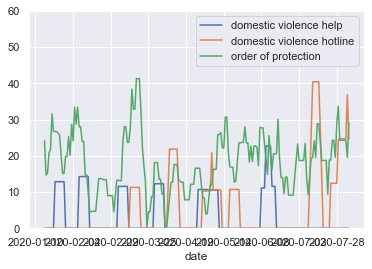

In [52]:
df.rolling(7, on='date').mean().plot(x='date', ylim=(0, 60))

In [103]:
domestic.drop('Unnamed: 0', inplace=True, axis=1)

In [104]:
domestic.drop('level_0', inplace=True, axis=1)

In [105]:
domestic

,date,domestic violence hotline,domestic violence help,domestic abuse hotline,domestic abuse help,order of protection
0,2020-01-10,0,0,0,0,0
1,2020-01-11,0,0,0,0,41
2,2020-01-12,0,0,0,0,0
3,2020-01-13,0,0,0,0,34
4,2020-01-14,0,0,0,0,0
...,...,...,...,...,...,...
204,2020-08-01,0,0,0,0,0
205,2020-08-02,0,0,0,0,0
206,2020-08-03,0,0,0,0,0
207,2020-08-04,0,0,0,0,36
